In [1]:
from dython.nominal import associations

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import h5py

In [2]:
features_list = [12, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 52]

In [3]:
def data_importing():

    # Get file
    f = h5py.File('tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5')

    # Enclose the file in a numpy array and retrieve information about that
    images = np.array(f.get("jetImage"))
    print('The file contains {} bidimensional item, each having {} rows x {} columns. They resemble an image.\n'\
                        .format(images.shape[0], images.shape[1], images.shape[2]))

    # For each item, extract the X's features
    feature_names = (f.get("jetFeatureNames"))[features_list]

    # Print the names of the features
    print('Names of the features:\n', feature_names)

    feature = pd.DataFrame(f.get("jets")[:,features_list], columns = feature_names)
    print('\nPrint the dataset: \n', feature.head(1))

    # For each item, extract the y's feature. The y's are one hot encoded, so we're dealing with a multiclass clusterization problem.
    target = pd.DataFrame(f.get('jets')[0:,-6:-1])
    print("\nSample y's row:\n", target[0:1])

    return images, feature, feature_names, target

data = data_importing()

The file contains 10000 bidimensional item, each having 100 rows x 100 columns. They resemble an image.

Names of the features:
 [b'j_zlogz' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt' b'j_c1_b2_mmdt'
 b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt' b'j_d2_b2_mmdt'
 b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt' b'j_m2_b2_mmdt'
 b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_mmdt' b'j_multiplicity']

Print the dataset: 
    b'j_zlogz'  b'j_c1_b0_mmdt'  b'j_c1_b1_mmdt'  b'j_c1_b2_mmdt'  \
0   -3.488422         0.471864         0.058537         0.014659   

   b'j_c2_b1_mmdt'  b'j_c2_b2_mmdt'  b'j_d2_b1_mmdt'  b'j_d2_b2_mmdt'  \
0         0.109481         0.025472         1.870292          1.73758   

   b'j_d2_a1_b1_mmdt'  b'j_d2_a1_b2_mmdt'  b'j_m2_b1_mmdt'  b'j_m2_b2_mmdt'  \
0            1.870292            0.211365         0.089198         0.032309   

   b'j_n2_b1_mmdt'  b'j_n2_b2_mmdt'  b'j_mass_mmdt'  b'j_multiplicity'  
0         0.331585         0.155772      141.861038               85.0

# Exploratory Data Analysis
or *finding interesting patterns and detect anomalies between making things harder*
### Analysis on X's

In [4]:
dataset = data[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   b'j_zlogz'          10000 non-null  float64
 1   b'j_c1_b0_mmdt'     10000 non-null  float64
 2   b'j_c1_b1_mmdt'     10000 non-null  float64
 3   b'j_c1_b2_mmdt'     10000 non-null  float64
 4   b'j_c2_b1_mmdt'     10000 non-null  float64
 5   b'j_c2_b2_mmdt'     10000 non-null  float64
 6   b'j_d2_b1_mmdt'     10000 non-null  float64
 7   b'j_d2_b2_mmdt'     10000 non-null  float64
 8   b'j_d2_a1_b1_mmdt'  10000 non-null  float64
 9   b'j_d2_a1_b2_mmdt'  10000 non-null  float64
 10  b'j_m2_b1_mmdt'     10000 non-null  float64
 11  b'j_m2_b2_mmdt'     10000 non-null  float64
 12  b'j_n2_b1_mmdt'     10000 non-null  float64
 13  b'j_n2_b2_mmdt'     10000 non-null  float64
 14  b'j_mass_mmdt'      10000 non-null  float64
 15  b'j_multiplicity'   10000 non-null  float64
dtypes: fl

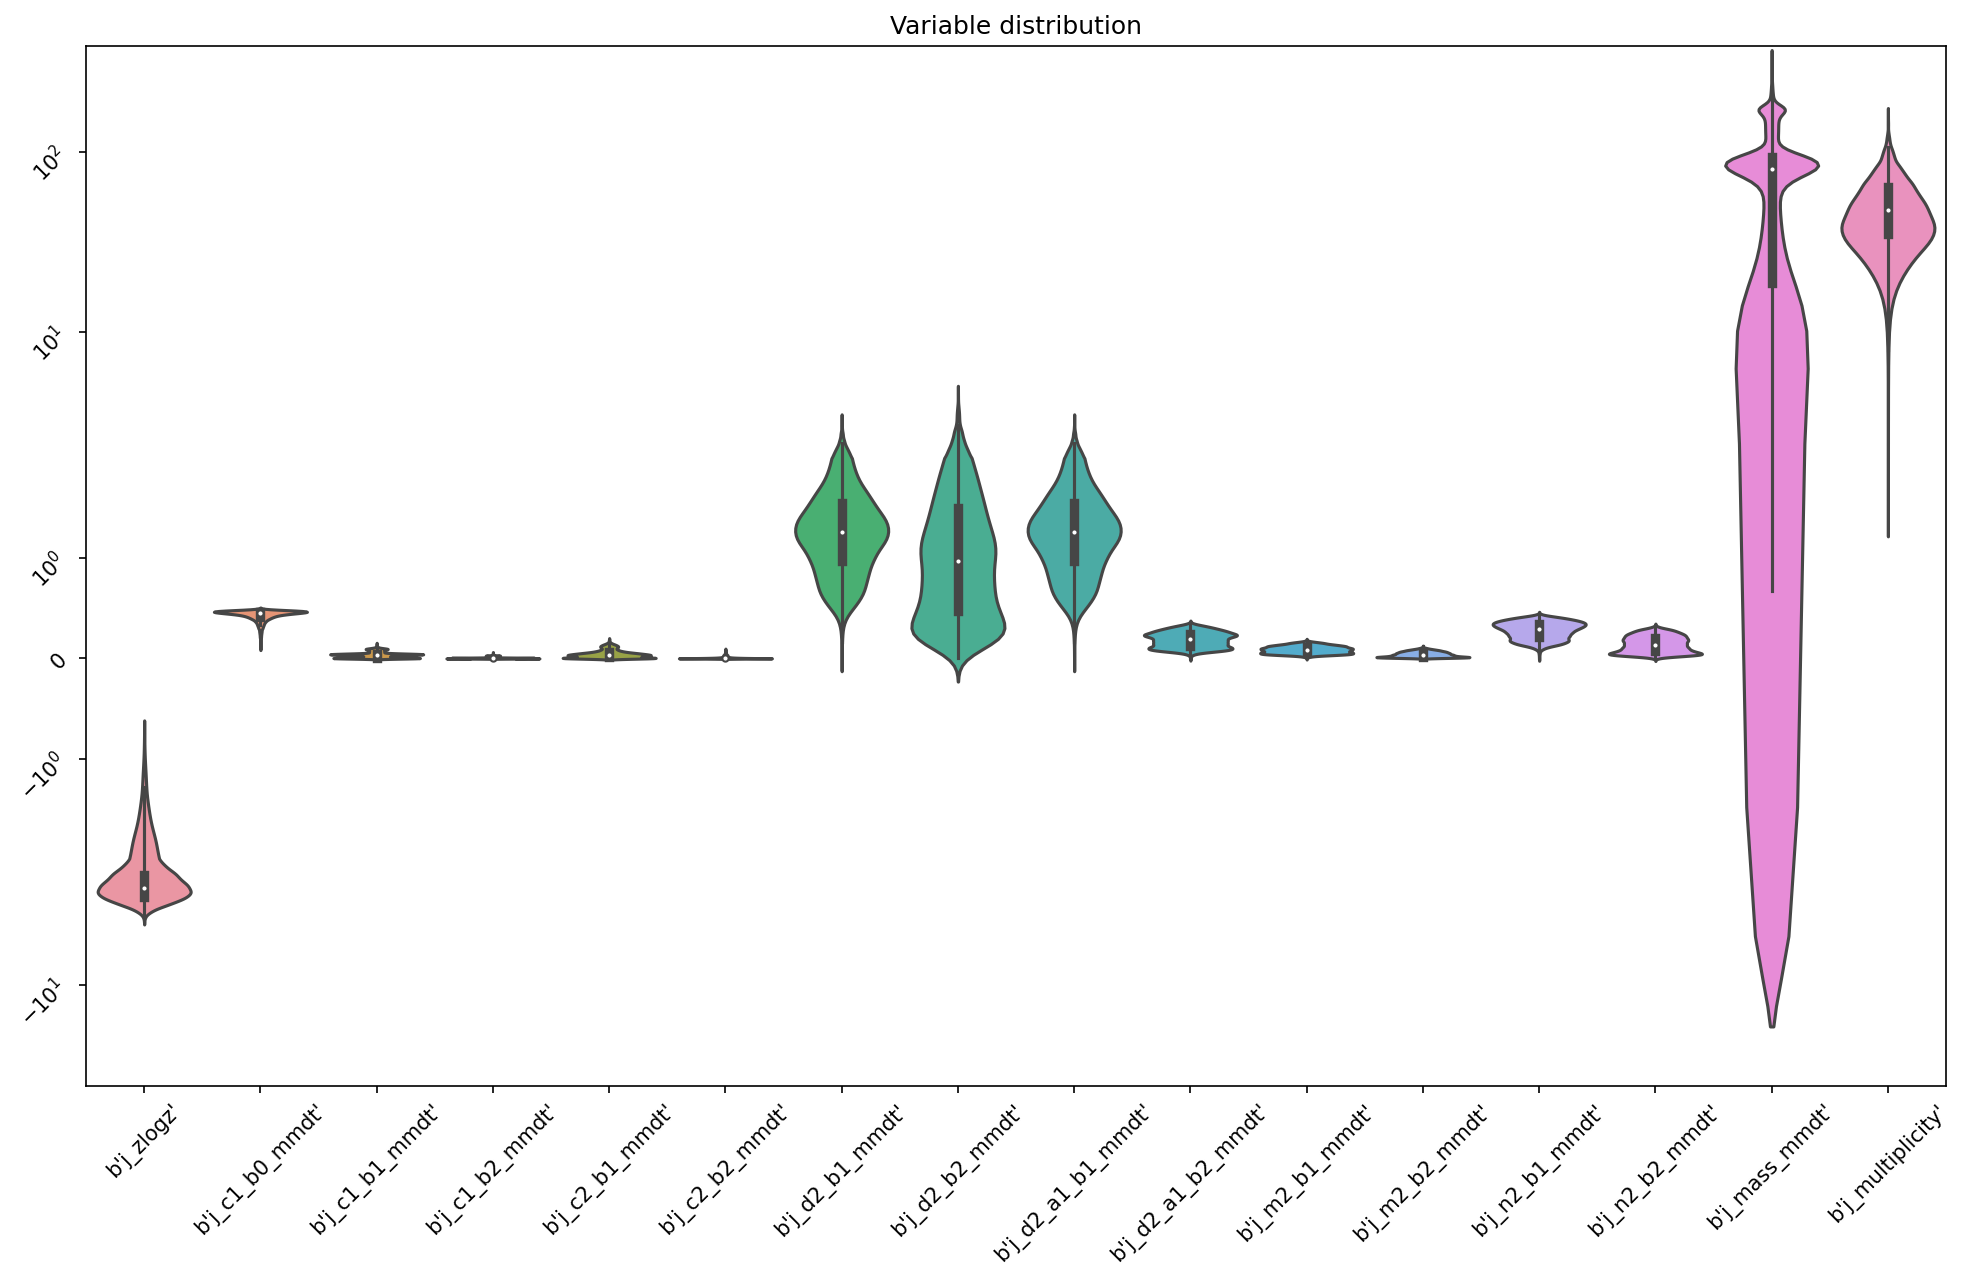


More details:
          b'j_zlogz'  b'j_c1_b0_mmdt'  b'j_c1_b1_mmdt'  b'j_c1_b2_mmdt'  \
count  10000.000000     10000.000000     10000.000000     1.000000e+04   
mean      -2.855662         0.432722         0.037811     8.050324e-03   
std        0.580443         0.055209         0.029239     9.421520e-03   
min       -4.452085         0.101666         0.000212     3.719361e-07   
25%       -3.274385         0.416808         0.009565     3.098769e-04   
50%       -2.904424         0.452043         0.038213     5.992901e-03   
75%       -2.475663         0.468595         0.048785     8.275260e-03   
max       -0.803105         0.491214         0.147435     6.122257e-02   

       b'j_c2_b1_mmdt'  b'j_c2_b2_mmdt'  b'j_d2_b1_mmdt'  b'j_d2_b2_mmdt'  \
count     10000.000000     1.000000e+04     10000.000000     10000.000000   
mean          0.045304     7.573312e-03         1.287895         1.073581   
std           0.038597     1.222201e-02         0.455578         0.727786   
min      

In [5]:
def metrics_on_x():

    print(dataset.info())
    print('\nEverything seems ok!\n')

    plt.figure(figsize = (16,9), dpi = 150)

    # Create a plot where the median, quartiles, outliers and probability distribution are shown for each column
    sns.violinplot(x="variable", y="value", data=pd.melt(dataset), scale = 'count')

    plt.tick_params(labelrotation = 45, labelsize = 10)
    plt.xlabel(None)
    plt.ylabel(None)

    if (dataset < 0).any().any():
        plt.yscale('symlog')
    else:
        plt.yscale('log')

    plt.title('Variable distribution')
    plt.show()

    # Give extra details about distribution
    print('\nMore details:\n', dataset.describe())

metrics_on_x()

### Analysis on y's

In [6]:
target = data[-1]

def metrics_on_y():

    # Extracting details
    print(target.info())

    # Checking if one and only one 1.0 per row
    print('\nDoes each row have one and only one 1 for each row?')
    if (target.sum(axis = 0).sum() == len(target)) & ((target.sum(axis = 1) > 0).any()):
        print('YES!\n')
    else:
        print('!!! THE DATASET HAS SOME PROBLEMS !!!\n')

    # Checking for imbalances
    print('Checking the pct distribution of each class to assess class unbalancing')
    print(target.sum(axis = 0) / len(target) * 100)

metrics_on_y()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB
None

Does each row have one and only one 1 for each row?
YES!

Checking the pct distribution of each class to assess class unbalancing
0    19.69
1    19.71
2    19.67
3    20.25
4    20.68
dtype: float64


### Correlation analysis between X's and y's

Correlation matrix with one-hot encoded target variables


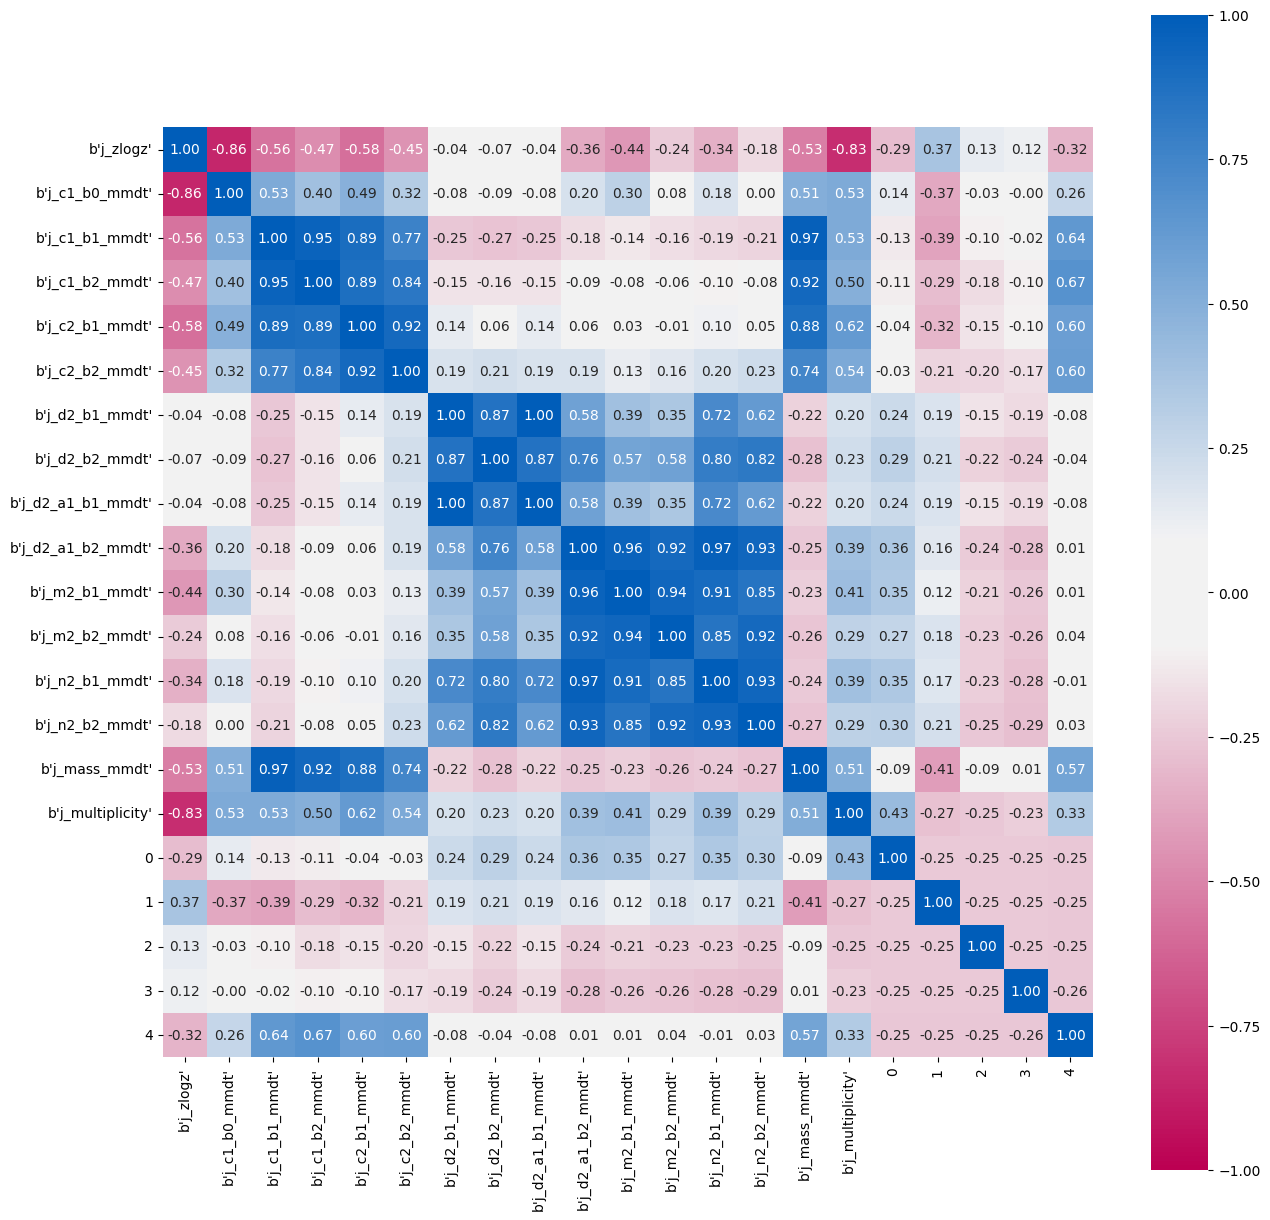

Correlation matrix with labelled target variable


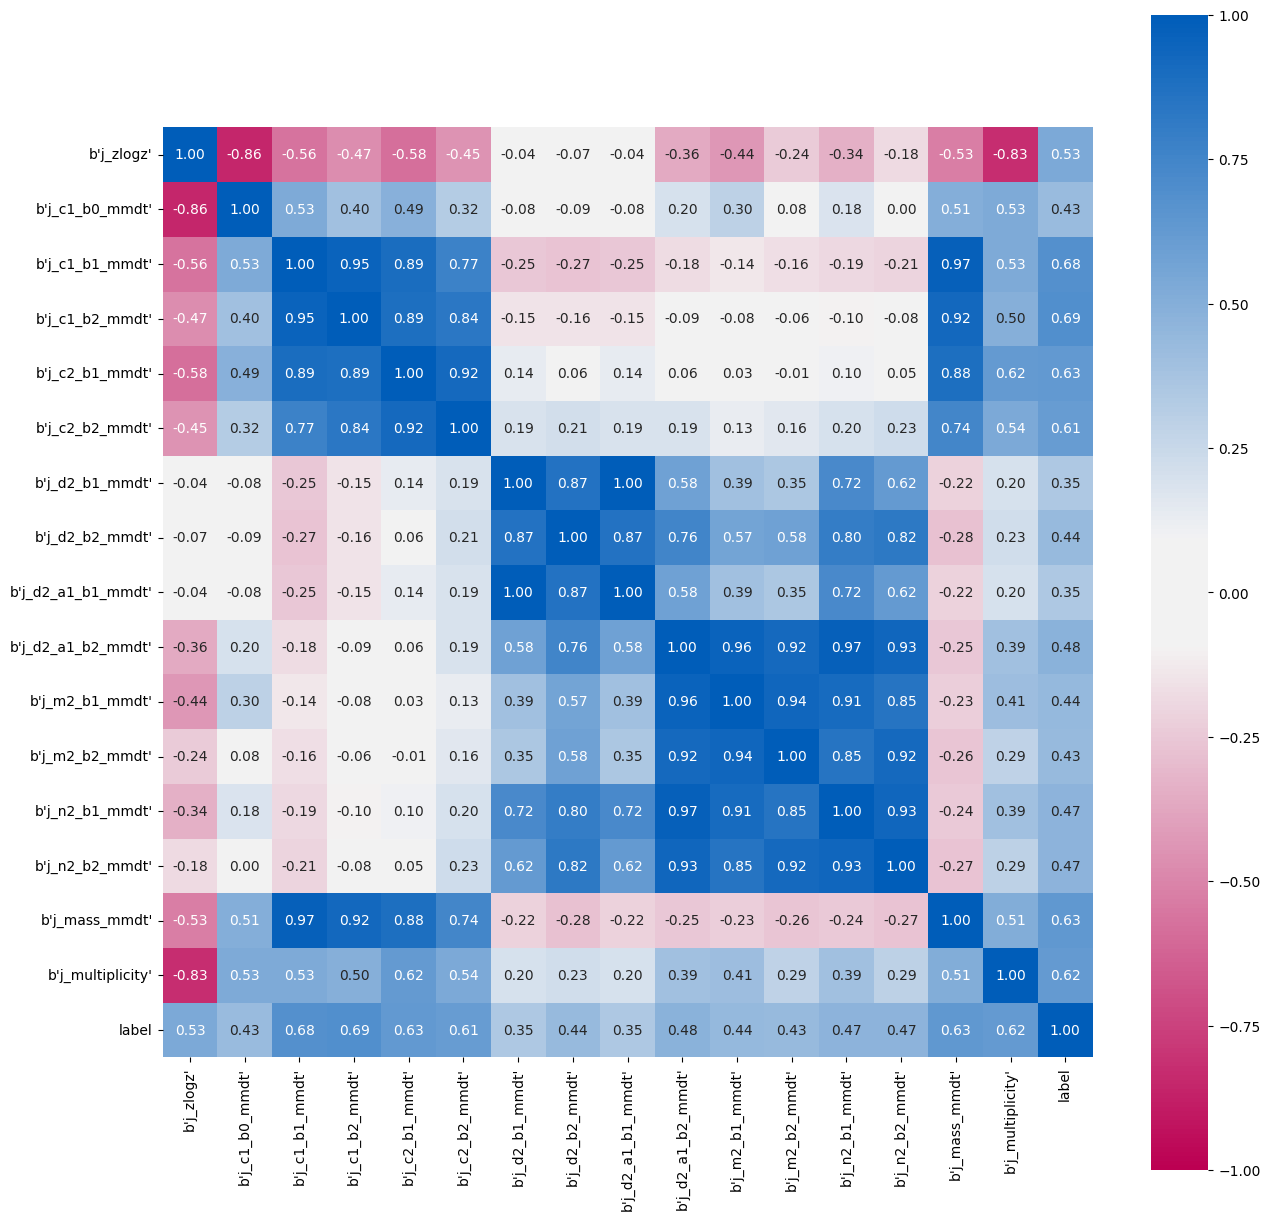

In [8]:
def corr_matrix(x):
        complete_correlation = associations(x,
                                            figsize=(15, 15),
                                            cmap = sns.diverging_palette(h_pos = 255, h_neg = 359, s=100, l=40, n=3, sep = 25,
                                                                         center="light", as_cmap=True))

def replace_numbers_with_letters(df):
        df = df.applymap(lambda x: 'A' if x == 0 else x)
        df = df.applymap(lambda x: 'B' if x == 1 else x)
        df = df.applymap(lambda x: 'C' if x == 2 else x)
        df = df.applymap(lambda x: 'D' if x == 3 else x)
        df = df.applymap(lambda x: 'E' if x == 4 else x)
        return df

def correlation():

    dataset_full_ohc = pd.concat([dataset, target], axis = 1)
    print('Correlation matrix with one-hot encoded target variables')
    corr_matrix(dataset_full_ohc)


    dataset_full_label = pd.DataFrame(columns=['label'], data=target.idxmax(axis=1))
    dataset_full_label = replace_numbers_with_letters(dataset_full_label)
    dataset_full_label = pd.concat([dataset, dataset_full_label], axis = 1)

    print('Correlation matrix with labelled target variable')
    corr_matrix(dataset_full_label)

correlation()